# Name: Swaroop Patil 

From Vishwakarma Institute of Technology, Pune

PRN No.-11910410

OnlineSales.ai Task

### Importing Required Libraries

In [1]:
import pandas as pd
import plotly as py
import numpy as np
import folium
import warnings
from IPython.display import display, HTML
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
from ipywidgets import interact
import ipywidgets as widgets
import seaborn as sns
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Creating date parser for parsing dates

In [2]:
def myparser(x):
    return datetime.strptime(x, '%d/%B/%Y %H:%M:%S')


### Reading csv file
(Data Augumentation)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/OnlineSales.ai/police_department_data.csv',parse_dates=True, date_parser=myparser) # ,index_col=['crime_date']

In [5]:
crime_df = df.copy()
crime_df.head()

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,"(37.775420706711, -122.403404791479)"
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212168,"(37.775420706711, -122.403404791479)"
2,141059263,WARRANTS,WARRANT ARREST,2016-04-25 14:59:00,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,14105926363010,"(37.7299809672996, -122.388856204292)"
3,160013662,NON-CRIMINAL,LOST PROPERTY,2016-01-05 23:50:00,TENDERLOIN,NONE,JONES ST / OFARRELL ST,16001366271000,"(37.7857883766888, -122.412970537591)"
4,160002740,NON-CRIMINAL,LOST PROPERTY,2016-01-01 00:30:00,MISSION,NONE,16TH ST / MISSION ST,16000274071000,"(37.7650501214668, -122.419671780296)"


### Getting the columns details

In [6]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   incident_id          150500 non-null  int64 
 1   category             150500 non-null  object
 2   crime_description    150500 non-null  object
 3   crime_date           150500 non-null  object
 4   department_district  150499 non-null  object
 5   resolution           150500 non-null  object
 6   address              150500 non-null  object
 7   department_id        150500 non-null  int64 
 8   location             150500 non-null  object
dtypes: int64(2), object(7)
memory usage: 10.3+ MB


###  Removing the brackets and commas from location columns
###  Spliting the location value into lat and long individual columns 
###  Maintaining atomcity of the columns

In [7]:
crime_df['location'] = crime_df['location'].str.replace('(', '')
crime_df['location'] = crime_df['location'].str.replace(')', '')
crime_df['location'] = crime_df['location'].str.replace(',', '')
crime_df[['lat','long']] = crime_df.location.str.split(expand=True)
crime_df.head(1)

,incident_id,category,crime_description,crime_date,department_district,resolution,address,department_id,location,lat,long
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,2016-01-29 11:00:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,12005827212120,37.775420706711 -122.403404791479,37.775420706711,-122.403404791479


###  Droping the location columns after seprating lat and long, location became redundant

In [8]:
crime_df= crime_df.drop('location', axis=1)


### Checking the cardanility of data

In [9]:
crime_df.shape

(150500, 10)

### Grouping data into categories of commited crime and visualizing data using bubble chart

In [10]:
category_df = pd.DataFrame((crime_df.groupby( [ "category"] ).count()).reset_index())
category_df.drop(['crime_description','crime_date','department_district','resolution','address','department_id','lat','long'], axis =1, inplace =True)
category_df = category_df.rename(columns={'incident_id': 'incident_count'})


In [13]:
category_df_sorted = category_df.sort_values('incident_count',ascending=False)
ipywLayout = widgets.Layout(border='solid 2px green')

def bubble_chart(Scroll):

        figBubble = px.scatter(
                                category_df_sorted.head(Scroll),
                                x = 'category', 
                                y ='incident_count',
                                size= 'incident_count',
                                color = 'category', 
                                hover_name='category' ,
                                size_max=60
                              )
        figBubble.update_layout(

                                title="Top Categories Under Commited Crime",
                                yaxis_title="Count of crime under categories",
                                xaxis_title="Categories",
                                font=dict(family="Trebuchet MS",size=16,color="#778899"),
                                xaxis_showgrid=True,
                                yaxis_showgrid=True,
                                plot_bgcolor='rgba(0,0,0,0)',
                                

                            )

        figBubble.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
        figBubble.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')

        figBubble.show();

interact(bubble_chart, Scroll=30);

interactive(children=(IntSlider(value=30, description='Scroll', max=90, min=-30), Output()), _dom_classes=('wi…

### Grouping data into department category of offences and visualizing data using bubble chart & bar chart

In [14]:
department_district = pd.DataFrame((crime_df.groupby( ["department_district"] ).count()).reset_index())
department_district.drop(['crime_description','crime_date','category','resolution','address','department_id','lat','long'], axis =1, inplace =True)
department_district = department_district.rename(columns={'incident_id': 'incident_count'})

In [16]:
department_district_sorted = department_district.sort_values('incident_count',ascending=False)
ipywLayout = widgets.Layout(border='solid 2px green')

def bubble_chart(Scroll):

        figBubble = px.scatter(
                                department_district_sorted.head(Scroll),
                                x = 'department_district', 
                                y ='incident_count',
                                size= 'incident_count',
                                color = 'department_district', 
                                hover_name='department_district' ,
                                size_max=60
                              )
        figBubble.update_layout(

                                title="Top Crime Commited in District wise Department",
                                yaxis_title="Count of crime committed",
                                xaxis_title="Deparments",
                                font=dict(family="Trebuchet MS",size=16,color="#778899"),
                                xaxis_showgrid=True,
                                yaxis_showgrid=True,
                                plot_bgcolor='rgba(255,255,255)',
                                

                            )

        figBubble.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='red')
        figBubble.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='red')

        figBubble.show();

interact(bubble_chart, Scroll=10);

interactive(children=(IntSlider(value=10, description='Scroll', max=30, min=-10), Output()), _dom_classes=('wi…

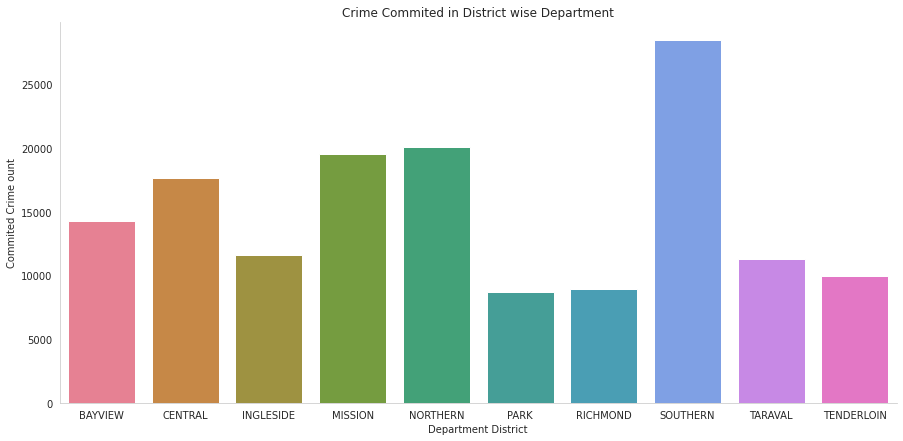

In [17]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(15,7))
figure = sns.barplot(x="department_district", y="incident_count", data=department_district,palette="husl");
sns.despine(bottom = False, left = False)
figure.set(xlabel = "Department District", ylabel = "Commited Crime ount");
figure.set_title('Crime Commited in District wise Department');

### visualization words using word clouds of maximum occurrence of categories size of the words tell the
### occurrence LARCENY/ THEFT have occurred maximum


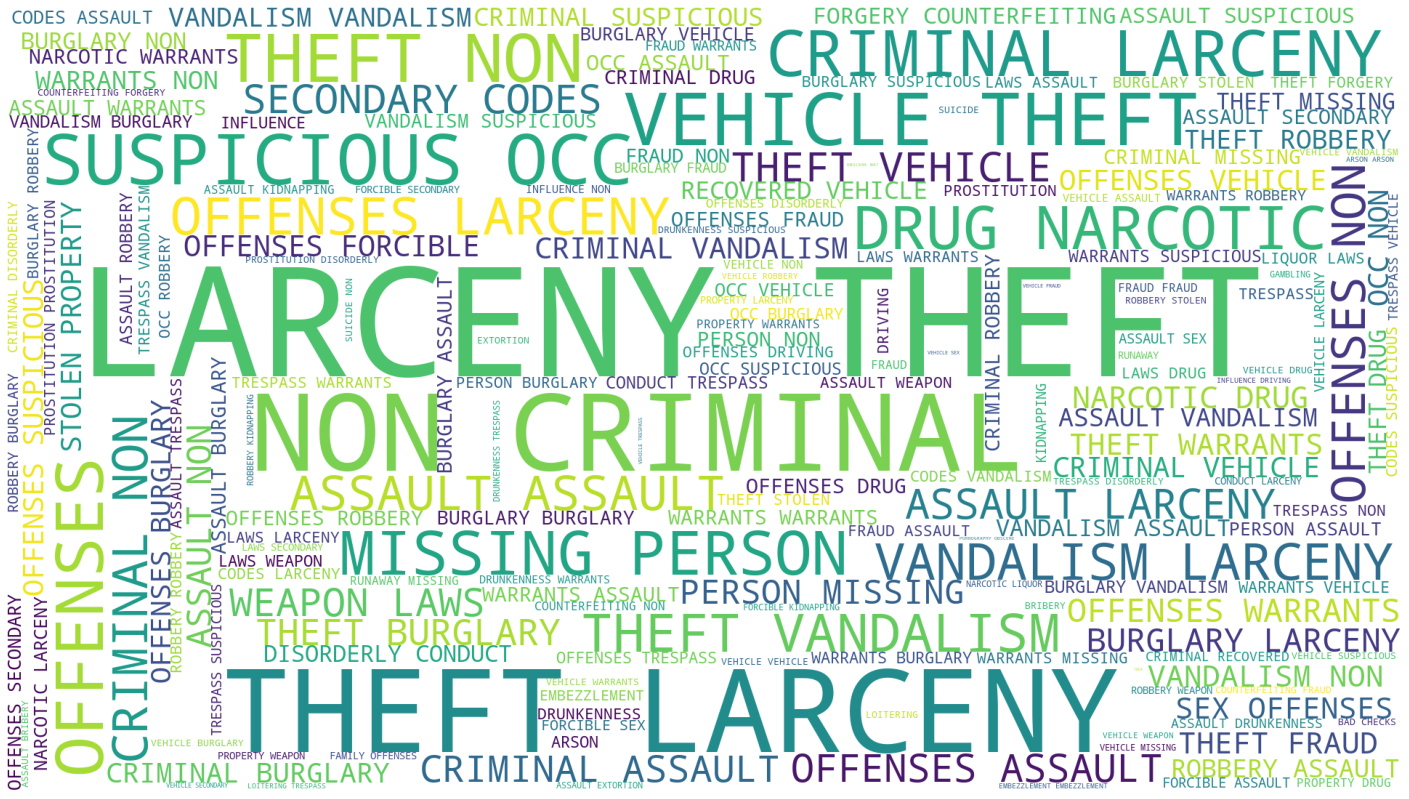

In [18]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(crime_df.category))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

### Pie Chart visualization

In [19]:
labels = crime_df.department_district.unique()
values=[]
for each in labels:
    values.append(len(df[crime_df.department_district==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [20]:
date_df = pd.DataFrame((crime_df.groupby( [ "crime_date"]).count()).reset_index())
date_df.set_index('crime_date',inplace=True)
date_df.head()

,incident_id,category,crime_description,department_district,resolution,address,department_id,lat,long
crime_date,,,,,,,,,
2016-01-01 00:01:00,68,68,68,68,68,68,68,68,68
2016-01-01 00:05:00,3,3,3,3,3,3,3,3,3
2016-01-01 00:07:00,3,3,3,3,3,3,3,3,3
2016-01-01 00:09:00,2,2,2,2,2,2,2,2,2
2016-01-01 00:10:00,4,4,4,4,4,4,4,4,4


### Analysis of data with respect to dates

In [21]:
date_df = pd.DataFrame((crime_df.groupby( [ "crime_date"]).count()).reset_index())
date_df.set_index('crime_date',inplace=True)
date_df.head()

,incident_id,category,crime_description,department_district,resolution,address,department_id,lat,long
crime_date,,,,,,,,,
2016-01-01 00:01:00,68,68,68,68,68,68,68,68,68
2016-01-01 00:05:00,3,3,3,3,3,3,3,3,3
2016-01-01 00:07:00,3,3,3,3,3,3,3,3,3
2016-01-01 00:09:00,2,2,2,2,2,2,2,2,2
2016-01-01 00:10:00,4,4,4,4,4,4,4,4,4


### Quaterly analysis of reporting of crime and visualizing by bar chart

In [22]:
date_df.index = pd.to_datetime(date_df.index,unit='ns',errors = 'coerce')
daily_df = date_df.resample('Q').mean()

daily_df.drop(['crime_description','category','resolution','address','department_id','lat','long','department_district'], axis =1, inplace =True)
daily_df = daily_df.rename(columns={'incident_id': 'crime_count'})

daily_df = daily_df.reset_index()
daily_df = pd.DataFrame(daily_df)

daily_df

,crime_date,crime_count
0,2016-03-31,2.277155
1,2016-06-30,2.197702
2,2016-09-30,2.239021
3,2016-12-31,2.253111


### formating the dates into date|month|year format excluding timestamp

In [23]:
daily_df['month'] = pd.DatetimeIndex(daily_df['crime_date']).month


def mapper(month):
    return month.strftime('%d/%b/%Y') 

daily_df['crime_date'] = daily_df['crime_date'].apply(mapper)
daily_df

,crime_date,crime_count,month
0,31/Mar/2016,2.277155,3
1,30/Jun/2016,2.197702,6
2,30/Sep/2016,2.239021,9
3,31/Dec/2016,2.253111,12


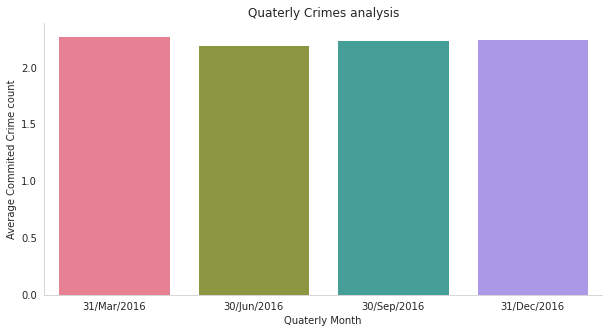

In [24]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,5))
figure = sns.barplot(x="crime_date", y="crime_count", data=daily_df,palette="husl");
figure.set_title('Quaterly Crimes analysis')
sns.despine(bottom = False, left = False)
figure.set(xlabel = "Quaterly Month", ylabel = "Average Commited Crime count");

### Week days analysis reporting of crime and visualizing by bar chart

In [25]:
daily_df['crime_date'] = pd.to_datetime(daily_df['crime_date'], errors='coerce')


### Extracting the weekdays from crime date

In [26]:
week_df = daily_df.groupby(daily_df['crime_date'].dt.day_name()).mean()
week_df


,crime_count,month
crime_date,,
Friday,2.239021,9.0
Saturday,2.253111,12.0
Thursday,2.237429,4.5


In [27]:
week_df = week_df.reset_index()
week_df = week_df.rename(columns={'crime_date': 'Day of Week'})
week_df.drop('month',axis=1,inplace=True)

In [28]:
week_df['crime_count'].values

array([2.23902144, 2.25311107, 2.23742867])

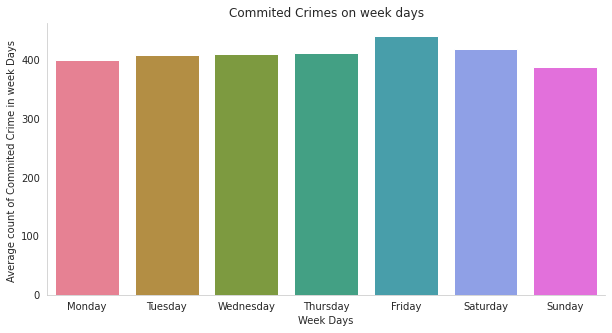

In [29]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(10,5))
figure = sns.barplot(x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'], 
                     y=[399.673077,408.500000,410.230769,411.442308,440.962264,418.339623,388.557692], 
                     data=week_df,
                     palette="husl");
sns.despine(bottom = False, left = False)
figure.set_title('Commited Crimes on week days')
figure.set(xlabel = "Week Days", ylabel = "Average count of Commited Crime in week Days ");

In [30]:
figBar = go.Figure(
    data=[
        go.Bar(
            
            name="Category",
            x= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'],
            y= [399.673077,408.500000,410.230769,411.442308,440.962264,418.339623,388.557692],
            #marker=dict(color='#0000FF')
        ),


    ],
    layout=go.Layout(
        title="Commited crimes on week days",
        yaxis_title="Crime count on week days",
        xaxis_title="Week Days",
        font=dict(family="Trebuchet MS",size=16,color="#778899"),
        xaxis_showgrid=True,
        yaxis_showgrid=True,
        width=700,
        height=600,
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)'
    )

)

figBar.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
figBar.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC'),
figBar.update_yaxes(automargin=True)

figBar.show();


### Monthly analysis reporting of crime and visualizing by bubble chart and bar chart

In [31]:
date_df.index = pd.to_datetime(date_df.index)
Monthly_df = date_df.resample('M').sum()

Monthly_df.drop(['crime_description','category','resolution','address','department_id','lat','long','department_district'], axis =1, inplace =True)
Monthly_df = Monthly_df.rename(columns={'incident_id': 'crime_count'})

Monthly_df = Monthly_df.reset_index()
Monthly_df = pd.DataFrame(Monthly_df)


### Extracting the Months from crime date

In [32]:
Monthly_df['month'] = pd.DatetimeIndex(Monthly_df['crime_date']).month
Monthly_df['month']

def mapper(month):
    return month.strftime('%b') 
Monthly_df['crime_date'] = Monthly_df['crime_date'].apply(mapper)
Monthly_df

,crime_date,crime_count,month
0,Jan,12946,1
1,Feb,12092,2
2,Mar,12362,3
3,Apr,12317,4
4,May,12713,5
5,Jun,12076,6
6,Jul,12166,7
7,Aug,12428,8
8,Sep,12473,9
9,Oct,13331,10


In [36]:
Monthly_df_sorted = Monthly_df.sort_values('crime_count',ascending=False)
ipywLayout = widgets.Layout(border='solid 2px green')

def bubble_chart(Scroll):

        figBubble = px.scatter(
                                Monthly_df_sorted.head(Scroll),
                                x = 'crime_date', 
                                y ='crime_count',
                                size= 'crime_count',
                                color = 'crime_date', 
                                hover_name='crime_date' ,
                                size_max=60
                              )
        figBubble.update_layout(

                                title="Top Months Commited Crime",
                                yaxis_title="Count of committed crime",
                                xaxis_title="Categories",
                                font=dict(family="Trebuchet MS",size=16,color="#778899"),
                                xaxis_showgrid=True,
                                yaxis_showgrid=True,
                                plot_bgcolor='rgba(0,0,0,0)',
                                

                            )

        figBubble.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
        figBubble.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')

        figBubble.show();

interact(bubble_chart, Scroll=12);

interactive(children=(IntSlider(value=12, description='Scroll', max=36, min=-12), Output()), _dom_classes=('wi…

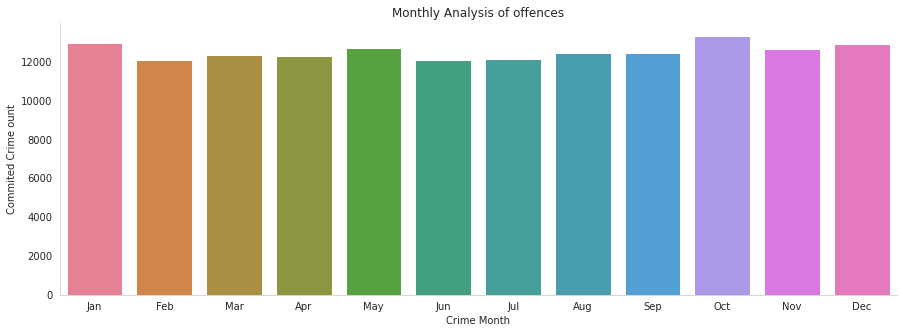

In [37]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(15,5))
figure = sns.barplot(x="crime_date", y="crime_count", data=Monthly_df,palette="husl");
sns.despine(bottom = False, left = False)
figure.set_title('Monthly Analysis of offences')
figure.set(xlabel = "Crime Month", ylabel = "Commited Crime ount");

### Grouping data into categories, department, & resolution inorder to find the pattern of type of offences
### commited in each district

In [38]:
crime_count = crime_df.drop( ['incident_id','crime_description', 'crime_date', 'address', 'department_id', 'lat'], axis=1)
crime_count = crime_count.groupby(['category', 'department_district', 'resolution']).count()
crime_count = crime_count.rename(columns={'long': 'count'})
crime_count = crime_count.reset_index()

### Visualisind the data by bar plot 

In [40]:
menu_district_dp = np.array(crime_df['department_district'].values.tolist()) 
menu_district_dp = np.unique(menu_district_dp)

districtCrimeBarWidget = widgets.Dropdown(options=menu_district_dp,
    value='BAYVIEW',
    description='<p style = "font-family:Trebuchet MS;font-size:15px;font-style:bold;font-color:#999999;"><b>District</b></p> :</br></br>',
    disabled=False
)

def district(district_dep):
    crime_count
   
    disFig = go.Figure(
        data=[
            go.Bar(
                name="District",
                x= crime_count['category'].unique(),
                y= crime_count['count'],
                marker=dict(color='#0000FF')
            ),
        ],
        layout=go.Layout(
            title="Crimes in District",
            yaxis_title="Count",
            xaxis_title="District",
            font=dict(family="Trebuchet MS",size=16,color="#778899"),
            xaxis_showgrid=True,
            yaxis_showgrid=True,
            width=700,
            height=600,
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )        
    )
    disFig.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
    disFig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC'),
    disFig.update_yaxes(automargin=True)
  
    disFig.show();
  

    
widgets.interact(district, district_dep = districtCrimeBarWidget);

interactive(children=(Dropdown(description='<p style = "font-family:Trebuchet MS;font-size:15px;font-style:bol…

### Visualizing maxium number of which type of crime commiting in district wise

### Creating dataframe of resolution and department to check the efficiency of department

In [41]:
resolution = pd.DataFrame((crime_df.groupby( [ "resolution",'department_district'] ).count()).reset_index())
resolution.drop(['crime_description','crime_date','address','department_id','category'], axis =1, inplace =True)
resolution = resolution.rename(columns={'incident_id': 'incident_count'})
resolution.head()

,resolution,department_district,incident_count,lat,long
0,"ARREST, BOOKED",BAYVIEW,3890,3890,3890
1,"ARREST, BOOKED",CENTRAL,3572,3572,3572
2,"ARREST, BOOKED",INGLESIDE,2755,2755,2755
3,"ARREST, BOOKED",MISSION,6531,6531,6531
4,"ARREST, BOOKED",NORTHERN,4352,4352,4352


### Visualizing the resolution and department to check the efficiency of department 

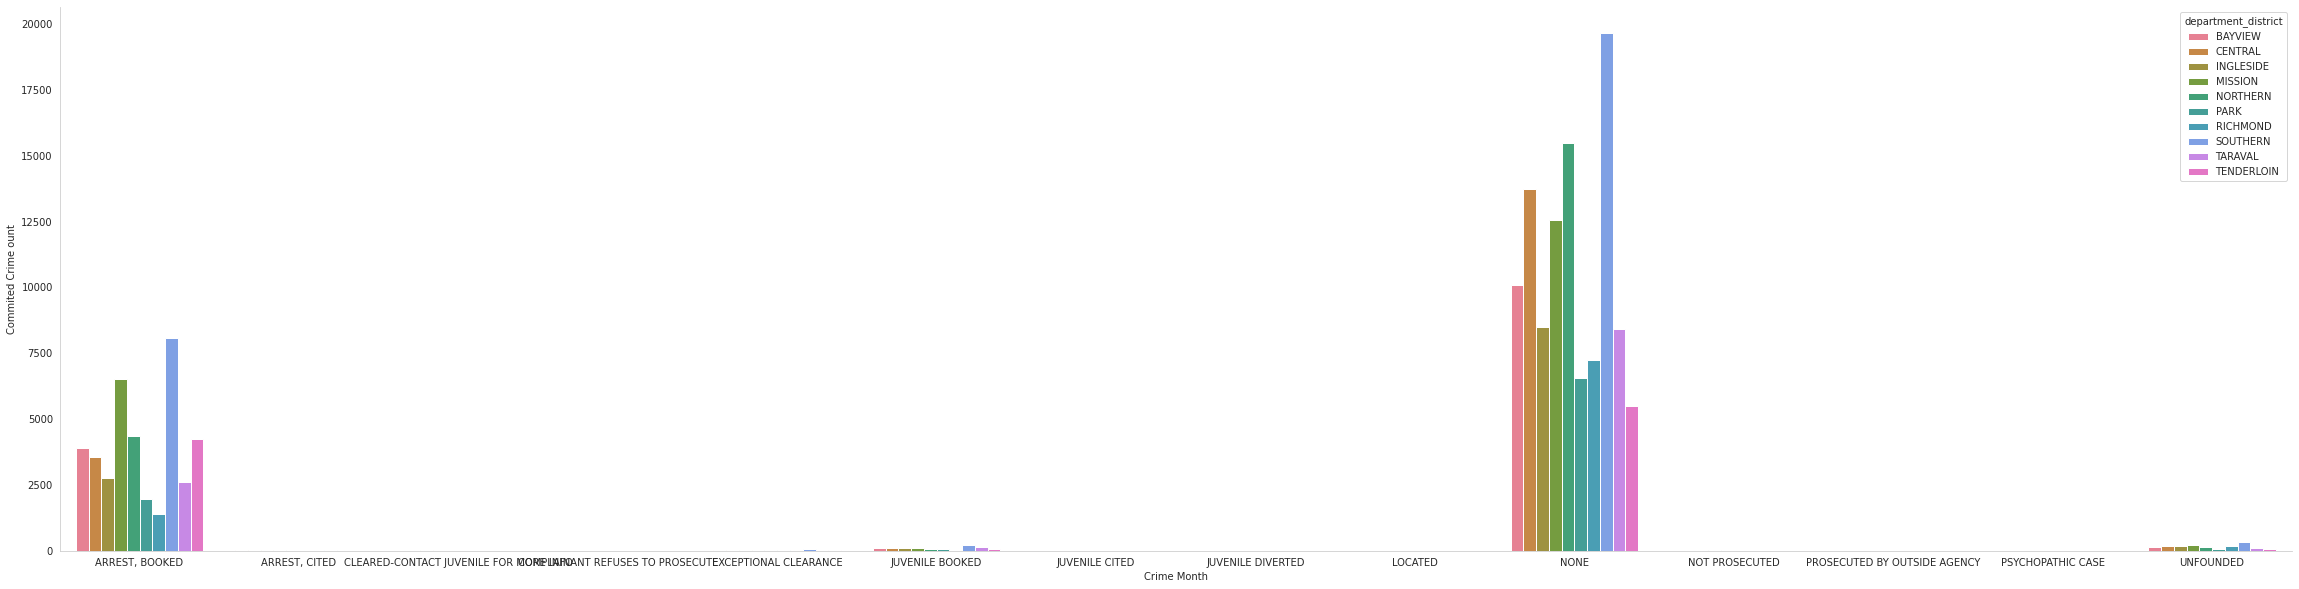

In [42]:
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize=(40,10))
figure = sns.barplot(x="resolution", y="incident_count",hue='department_district', data=resolution,palette="husl");
sns.despine(bottom = False, left = False)
figure.set(xlabel = "Crime Month", ylabel = "Commited Crime ount");

In [44]:

menu = np.array(resolution['department_district'].values.tolist()) 
menu = np.unique(menu)

departmentdistrictBar = widgets.Dropdown(options=menu,
    value='CENTRAL',
    description='<p style = "font-family:Trebuchet MS;font-size:15px;font-style:bold;font-color:#999999;"><b>District</b></p> :</br></br>',
    disabled=False
)

def department_district(department_district):
    department_district = resolution.loc[resolution['department_district'] == department_district]
   
    figBar = go.Figure(
        data=[
            go.Bar(
                name="Resolution",
                x= department_district['resolution'].values,
                y= department_district['incident_count'].values,
                marker=dict(color='#CB33FF')

            ),
            
        
        ],
        layout=go.Layout(
            title="Efficiency of the department to resolve issues",
            yaxis_title="count",
            xaxis_title="offences category",
            font=dict(family="Trebuchet MS",size=16,color="#778899"),
            xaxis_showgrid=True,
            yaxis_showgrid=True,
            width=700,
            height=600,
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)'
        )
        
    )
  
    figBar.update_xaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC')
    figBar.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#DCDCDC'),
    figBar.update_yaxes(automargin=True)
    
    figBar.show();
    
interact(department_district,department_district = departmentdistrictBar);

interactive(children=(Dropdown(description='<p style = "font-family:Trebuchet MS;font-size:15px;font-style:bol…

### Creating dataframe for location using lat long

In [45]:
location_df = crime_df[['category','crime_date','crime_description','department_district','lat','long']]
location_df = pd.concat([location_df,category_df], axis=1)
location_df

,category,crime_date,crime_description,department_district,lat,long,category,incident_count
0,WEAPON LAWS,2016-01-29 11:00:00,POSS OF PROHIBITED WEAPON,SOUTHERN,37.775420706711,-122.403404791479,ARSON,286.0
1,WEAPON LAWS,2016-01-29 11:00:00,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",SOUTHERN,37.775420706711,-122.403404791479,ASSAULT,13577.0
2,WARRANTS,2016-04-25 14:59:00,WARRANT ARREST,BAYVIEW,37.7299809672996,-122.388856204292,BAD CHECKS,34.0
3,NON-CRIMINAL,2016-01-05 23:50:00,LOST PROPERTY,TENDERLOIN,37.7857883766888,-122.412970537591,BRIBERY,66.0
4,NON-CRIMINAL,2016-01-01 00:30:00,LOST PROPERTY,MISSION,37.7650501214668,-122.419671780296,BURGLARY,5802.0
...,...,...,...,...,...,...,...,...
150495,ASSAULT,2016-12-30 21:01:00,BATTERY,PARK,37.7714278595913,-122.453981622365,NaN,NaN
150496,NON-CRIMINAL,2016-12-30 08:00:00,LOST PROPERTY,CENTRAL,37.7966261239618,-122.401857374739,NaN,NaN
150497,LARCENY/THEFT,2016-12-29 20:00:00,PETTY THEFT OF PROPERTY,CENTRAL,37.7906727649886,-122.41226909106,NaN,NaN
150498,LARCENY/THEFT,2016-12-30 10:00:00,GRAND THEFT OF PROPERTY,CENTRAL,37.7882745285785,-122.406658711008,NaN,NaN


### Plotting the lat long and viualizing the offences

In [46]:
district_crime_count = crime_count.groupby(['department_district']).count().sort_values('count', ascending=False)
district_crime_count = district_crime_count.drop(['category','resolution'], axis=1)
district_crime_count = district_crime_count.reset_index()
district_crime_count

,department_district,count
0,MISSION,141
1,SOUTHERN,141
2,BAYVIEW,124
3,INGLESIDE,124
4,NORTHERN,121
5,TARAVAL,110
6,TENDERLOIN,105
7,RICHMOND,102
8,CENTRAL,100
9,PARK,99


In [47]:

# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '20px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#999999'),
  ('background-color', '#f7f7f9')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props)
  ]



# Fetching the number of desired rows using interaction.

fig = go.FigureWidget( layout=go.Layout() )

def highlight_col(x):
    

                    department_district = 'background-color: #99ebff'
                    count = 'background-color: #99ff99'
                    
                    

                    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
                    df1.iloc[:, 0] = department_district
                    df1.iloc[:, 1] = count
                    
                   


                    return df1

def show_Details(Number):
    n = int(Number)
    pd.options.display.float_format = '{:.2f}'.format
    s = district_crime_count.head(n).style.apply(highlight_col, axis=None) 
    s = s.hide_index()
    s.set_precision(20)
    s.set_table_styles(styles)
    s.set_properties(**{'border-style': 'solid',
                        'border-color': '#e0e0eb',
                        'border-width':'0.015px',
                        'color': 'black',
                        'font-family':'Trebuchet MS',
                        'font-weight':'bold',
                        'text-align':'center',
                        'width':'119.5px'
                           })
    #s = s.set_caption('<h3>Top Worst Hit State</h3><br>')
    pd.options.display.float_format = '{:.2f}'.format
    pd.option_context('display.colheader_justify','center')
    return s;


interact(show_Details, Number='10');


interactive(children=(Text(value='10', description='Number'), Output()), _dom_classes=('widget-interact',))

In [48]:
lat_long = crime_df[['department_district', 'lat', 'long']].drop_duplicates(['department_district'])
lat_long.reset_index(drop=True, inplace=True)
lat_long

,department_district,lat,long
0,SOUTHERN,37.775420706711,-122.403404791479
1,BAYVIEW,37.7299809672996,-122.388856204292
2,TENDERLOIN,37.7857883766888,-122.412970537591
3,MISSION,37.7650501214668,-122.419671780296
4,NORTHERN,37.788018555829,-122.426077177375
5,TARAVAL,37.7644781578695,-122.477376524003
6,INGLESIDE,37.7292705199592,-122.432325871028
7,CENTRAL,37.791642982384,-122.40090869889
8,RICHMOND,37.7714939969416,-122.507750131004
9,PARK,37.7749912944366,-122.437799703468


In [49]:
district_crime_count = pd.merge(district_crime_count, lat_long, on='department_district')


In [50]:
district_crime_count.dropna(inplace=True)

In [51]:
district_crime_count

,department_district,count,lat,long
0,MISSION,141,37.7650501214668,-122.419671780296
1,SOUTHERN,141,37.775420706711,-122.403404791479
2,BAYVIEW,124,37.7299809672996,-122.388856204292
3,INGLESIDE,124,37.7292705199592,-122.432325871028
4,NORTHERN,121,37.788018555829,-122.426077177375
5,TARAVAL,110,37.7644781578695,-122.477376524003
6,TENDERLOIN,105,37.7857883766888,-122.412970537591
7,RICHMOND,102,37.7714939969416,-122.507750131004
8,CENTRAL,100,37.791642982384,-122.40090869889
9,PARK,99,37.7749912944366,-122.437799703468


In [52]:
northing = 37.78
easting = -122.40
world_map = folium.Map(location=[northing,easting], tiles="cartodbpositron", zoom_start=12, max_zoom = 25, min_zoom = 2)


for i in range(0,len(district_crime_count)):
    folium.Marker(
        location=[district_crime_count.iloc[i]['lat'], district_crime_count.iloc[i]['long']],
        fill=True,
        #radius=(int(location_df.iloc[i,-1]),
        color='#ffb3d9',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: #cccccc; color: #000000;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+district_crime_count.iloc[i]['department_district'] + "</h4>"
                    "<hr style='margin:10px;color: #4d4d4d;'>"+
                    "<ul style='color: #000000;font-weight: bold;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>District: "+str(district_crime_count.iloc[i,0])+"</li>"+
                        "<li>Crime count:   "+str(district_crime_count.iloc[i,1])+"</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map

# **Thank You!!**